<b><h2>Linear Algebra (CpE210A)<h2><b>
    
    
<b><h3>Laboratory 2: Plotting Vectors using NumPy and MatPlotLib<h3><b>
    
<h7>Coded and Submitted by:<h7>
    
<i><h7>Gonzales, James B.<h7><i>
    
<i><h7>58011<h7><i>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

In [6]:
## START OF FUNCTION
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)      ## since we don't actually have eagle tracking data we will use
    lat = np.random.randint(-10,10, size=3)       ## random integers for this activity. These two lines will produce
                                        

    dist1 = np.array([lat[0], long[0]])                                ## setup the array for each vector for the eagle's flight.
    dist2 = np.array([lat[1], long[1]])
    dist3 = np.array([lat[2], long[2]])
    

    dist_total = np.add(dist3,(np.add(dist1, dist2)))                  ## compute for the resultant vector for the eagle's flight.
    disp = np.sqrt((dist_total[0]**2) + (dist_total[1]**2))            ## compute for the magnitude of the displacement
    alpha = 10**-6
    theta = np.arctan(dist_total[1]/(alpha + dist_total[0]))           ## compute for the angle of the displacement. Hint
    theta = np.degrees(theta)                                          ## convert theta from rad to deg.
    
    ## Plotting the PH Eagle flight vectors.
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    n = 2
    
    ### Self-discovery code block (Refer to guide question 2 for the task)
    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
    
## END OF FUNCTION  

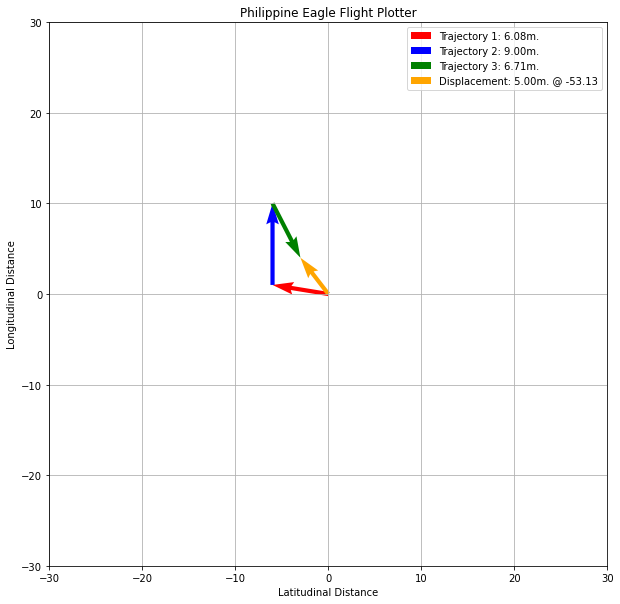

In [8]:
track_eagle(make_figs=False) ## Let 'make_figs' equal to False during debugging.

The eagle_kinematics function is created to calculate the vector, speed and accelaration. An input from user is needed to produce an output from this program. The input needed are speed and time. The equations that will be use in the graded cell 2 are listed below.

$$speed_{vector}=(speed_{w} time\_vect_{w}) + (speed_{x} time\_vect_{x}) + (speed_{y} time\_vect_{y}) + (speed_{z} time\_vect_{z})$$ 

$$vector_{time}=(vector_{x} time\_vect_{x}) + (vector_{y} time\_vect_{y}) + (vector_{z} time\_vect_{z})$$ 

$$acceleration_{time}=(acceleration_{x} time\_vect_{y}) + (acceleration_{y} time\_vect_{z})$$ 

In [2]:
def eagle_kinematics(speed, time):
    req_shape = 4                                                  #required shape of the array to be inputted 
    vector = np.zeros((req_shape-1,))                              #declaration of the vector array with default value
    acceleration = np.zeros((req_shape-2,))                        #declaration othe acceleration array with default value
    time_vect = np.array([time**3, time**2, time, 1])              #declaration of the time_vect array, values used are from inputted value of time
    if speed.shape == (req_shape,):
        vector = np.array([3*speed[0],2*speed[1], speed[2]])       #dimension/array of the vector, values used are the ones inputted in the speed array
        acceleration = np.array([2*vector[0],vector[1]])           #dimension/array of the acceleration of the vector, values used are in the vector array 
        speed_time = np.sum(np.multiply(speed, time_vect))         #calculation of the speed of the vector
        vector_time = np.sum(np.multiply(vector, time_vect[1:]))   #calculation of the vector 
        acceleration_time = np.sum(np.multiply(acceleration, time_vect[2:])) #calculation for the acceleration time
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')  #Message error when inputted values are wrong
    
    return speed_time, vector_time, acceleration_time

In [33]:
speed = np.array([2,1,3,2])
time = 2
eagle_kinematics(speed, time)

(28, 31, 26)

In [31]:
## START OF FUNCTION
def month_profit_trace(profit, reach, make_figs=True):                        ## You can simplify/ optimize this code for extra points
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array([reach[0], profit[0]])                               ## setup of array for each vector
        week2 = np.array([reach[1], profit[1]])
        week3 = np.array([reach[2], profit[2]])
        week4 = np.array([reach[3], profit[3]])
        
        week_total = np.add(week4, np.add(week3, np.add(week1, week2)))       ## computation for the total of weeks/ resultant of the vectors
        week_performance = np.sqrt((week_total[0]**2)+(week_total[1]**2))     ## computation for the displacement
        alpha = 10**-6
        reach_gradient = np.arctan(week_total[1]/(alpha + week_total[0]))     ## computation for angle of displacement
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')                          
        plt.xlim(0,1.01*np.sum(reach))                                        ## declaration the min and max value of x-axis
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))              ## declaration of min and max value of y_axis
        plt.xlabel('FB Post Reach Increment')                                
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
        plt.quiver(0,0, week1[0], week1[1],                                                       ## plotting the week1 vector
                   angles='xy', scale_units='xy',scale=1, color='yellowgreen', width=0.0025,    
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        ## put necessary vector plotting code here
        
        plt.quiver(week1[0], week1[1], week2[0], week2[1],                                        ## plotting the week2 vector
               angles='xy', scale_units='xy',scale=1, color='lightgreen', width=0.0025,
              label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
        plt.quiver(np.add(week1[0],week2[0]), np.add(week1[1],week2[1]),                          ## plotting the week3 vector
               week3[0], week3[1], angles='xy', scale_units='xy',scale=1, color='green', width=0.0025,
              label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        x= np.add(week1[0],np.add(week2[0],week3[0]))                                             ## coordinates for the starting point of the week4 vector
        y= np.add(week1[1],np.add(week2[1],week3[1]))
        plt.quiver(x, y,                                                                          ## plotting the week4 vector
              week4[0], week4[1], angles='xy', scale_units='xy',scale=1, color='darkgreen', width=0.0025,
              label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
        plt.quiver(0,0, week_total[0], week_total[1],                                             ## plotting the efficiency vector
                   angles='xy', scale_units='xy',scale=1, color='red', width=0.005,
                  label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))


        plt.legend(loc='upper left')                                                             ## placement of legend on the graph

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Make sure that the inputted vector shape for profit and reach is (4,)') 

## END OF FUNCTION 

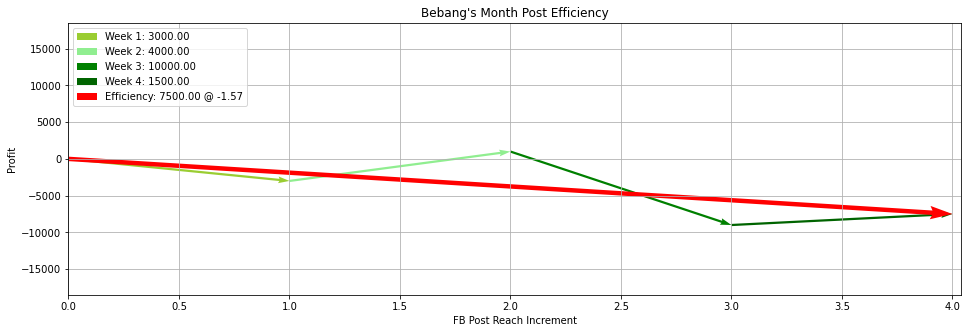

In [34]:
profit= np.array([-3000, 4000, -10000, 1500])       ## You can change the values to make different scenarios
reach = np.array([1, 1, 1, 1])                      ## You can change the values to make different scenarios

month_profit_trace(profit, reach, make_figs=False)  ## Toggle 'make_figs' during debugging or making documentations